In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('D:\\Datasets\\MentalHealthSurvey.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    87 non-null     object
 1   age                       87 non-null     int64 
 2   university                87 non-null     object
 3   degree_level              87 non-null     object
 4   degree_major              87 non-null     object
 5   academic_year             87 non-null     object
 6   cgpa                      87 non-null     object
 7   residential_status        87 non-null     object
 8   campus_discrimination     87 non-null     object
 9   sports_engagement         87 non-null     object
 10  average_sleep             87 non-null     object
 11  study_satisfaction        87 non-null     int64 
 12  academic_workload         87 non-null     int64 
 13  academic_pressure         87 non-null     int64 
 14  financial_concerns        87

In [3]:
df.head()

,gender,age,university,degree_level,degree_major,academic_year,cgpa,residential_status,campus_discrimination,sports_engagement,...,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,stress_relief_activities
0,Male,20,PU,Undergraduate,Data Science,2nd year,3.0-3.5,Off-Campus,No,No Sports,...,5,4,5,4,3,2,1,1,2,"Religious Activities, Social Connections, Onli..."
1,Male,20,UET,Postgraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,No,1-3 times,...,5,4,4,1,3,3,3,3,4,Online Entertainment
2,Male,20,FAST,Undergraduate,Computer Science,3rd year,2.5-3.0,Off-Campus,No,1-3 times,...,5,5,5,3,4,2,3,3,1,"Religious Activities, Sports and Fitness, Onli..."
3,Male,20,UET,Undergraduate,Computer Science,3rd year,2.5-3.0,On-Campus,No,No Sports,...,3,5,4,4,1,5,5,5,3,Online Entertainment
4,Female,20,UET,Undergraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,Yes,No Sports,...,3,5,5,2,3,5,5,4,4,Online Entertainment


In [4]:
df.describe()

,age,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,19.942529,3.931034,3.885057,3.781609,3.390805,2.781609,3.218391,3.218391,3.241379,3.011494
std,1.623636,1.043174,0.854880,1.125035,1.400634,1.175578,1.367609,1.297809,1.405682,1.385089
min,17.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,19.000000,3.000000,3.000000,3.000000,2.500000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,20.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,21.000000,5.000000,4.500000,5.000000,5.000000,4.000000,4.000000,4.000000,4.500000,4.000000
max,26.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
# Split the strings into lists
df['stress_relief_activities'] = df['stress_relief_activities'].str.split(', ')

In [6]:
# Explode the list into separate rows
df_exploded = df.explode('stress_relief_activities').copy()
df_exploded.head()

,gender,age,university,degree_level,degree_major,academic_year,cgpa,residential_status,campus_discrimination,sports_engagement,...,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,stress_relief_activities
0,Male,20,PU,Undergraduate,Data Science,2nd year,3.0-3.5,Off-Campus,No,No Sports,...,5,4,5,4,3,2,1,1,2,Religious Activities
0,Male,20,PU,Undergraduate,Data Science,2nd year,3.0-3.5,Off-Campus,No,No Sports,...,5,4,5,4,3,2,1,1,2,Social Connections
0,Male,20,PU,Undergraduate,Data Science,2nd year,3.0-3.5,Off-Campus,No,No Sports,...,5,4,5,4,3,2,1,1,2,Online Entertainment
1,Male,20,UET,Postgraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,No,1-3 times,...,5,4,4,1,3,3,3,3,4,Online Entertainment
2,Male,20,FAST,Undergraduate,Computer Science,3rd year,2.5-3.0,Off-Campus,No,1-3 times,...,5,5,5,3,4,2,3,3,1,Religious Activities


## EDA

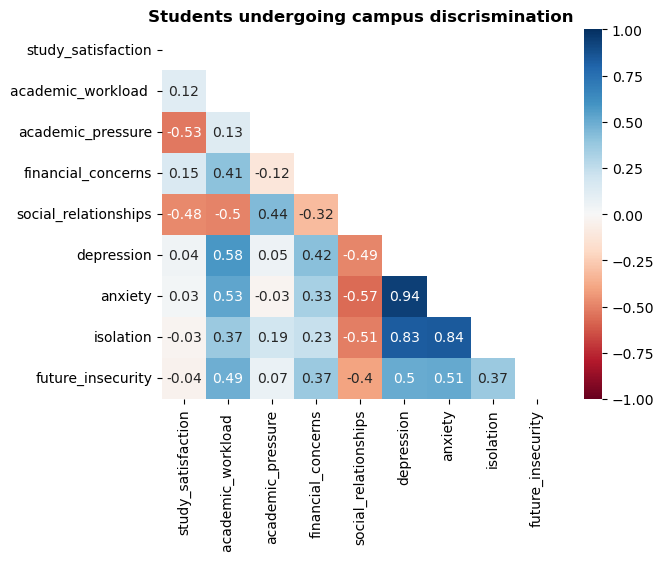

In [16]:
# Filter data with campus discrimination and Select only numeric columns for correlation
df_discriminated = df_exploded[df_exploded['campus_discrimination']=='Yes']
df_discriminated_numeric = df_discriminated.loc[:,'study_satisfaction':'future_insecurity']

# Calculate the correlation matrix
matrix_yes = df_discriminated_numeric.corr().round(2)
mask_yes = np.triu(np.ones_like(matrix_yes, dtype=bool))
sns.heatmap(matrix_yes, annot=True,vmin=-1, vmax=1,center=0,cmap='RdBu', mask=mask_yes)
plt.title('Students undergoing campus discrismination', fontweight='bold')
plt.show()

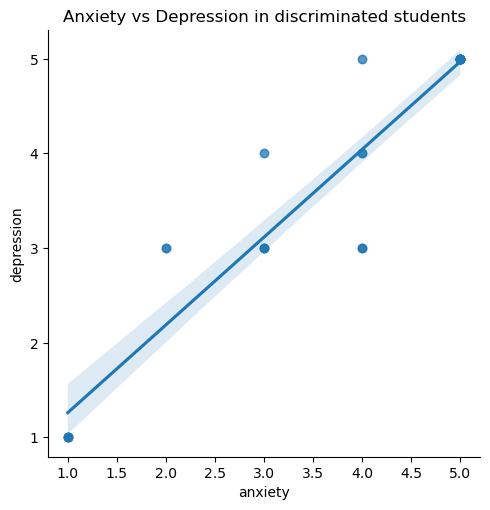

In [17]:
sns.lmplot(df_discriminated, x='anxiety', y = 'depression', scatter_kws={'alpha':0.5})
plt.title('Anxiety vs Depression in discriminated students')
plt.show()

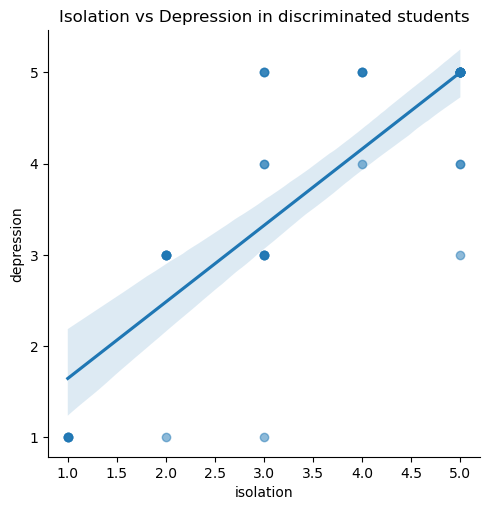

In [18]:
sns.lmplot(df_discriminated, x='isolation', y = 'depression', scatter_kws={'alpha':0.5})
plt.title('Isolation vs Depression in discriminated students')
plt.show()

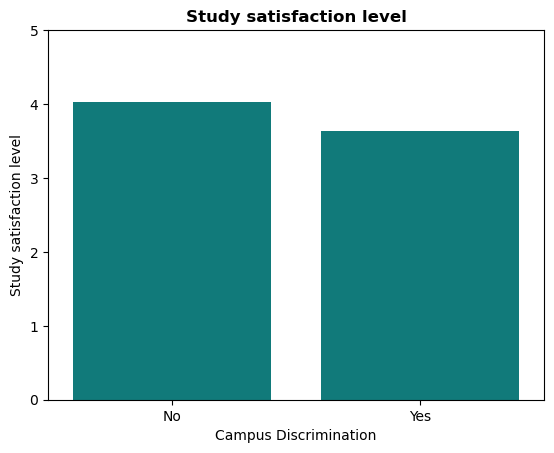

In [8]:
# Campus Discrimination VS Study satisfaction level
satisfaction = df.pivot_table(index='campus_discrimination', values='study_satisfaction', aggfunc='mean')
sns.barplot(satisfaction, x= satisfaction.index, y = 'study_satisfaction', color='darkcyan')
plt.ylim(0,5)
plt.xlabel('Campus Discrimination')
plt.ylabel('Study satisfaction level')
plt.title('Study satisfaction level', fontweight='bold')
plt.show()

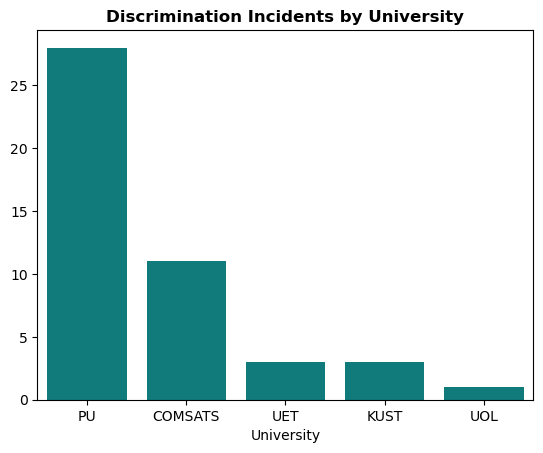

In [9]:
# Discrimination by university
df_discriminated_univ = df_discriminated.university.value_counts().sort_values(ascending=False)
sns.barplot(data = df_discriminated_univ, color='darkcyan')
plt.title('Discrimination Incidents by University',fontweight='bold')
plt.xlabel("University")
plt.ylabel('')
plt.show()

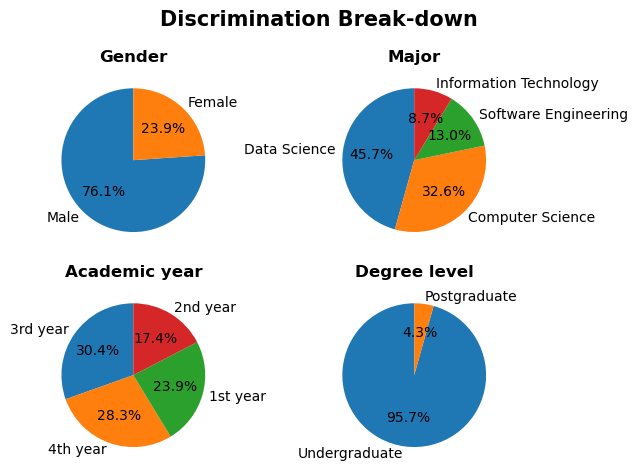

In [10]:
dict_column = {'gender':'Gender', 'degree_major':'Major','academic_year':'Academic year', 'degree_level':'Degree level'}

fig, ax = plt.subplots(2,2)
figsize=(10, 8)

# Flatten the 2D array of axes to make it easier to iterate over
ax_flat = ax.flatten()

# Iterate over the columns and titles
for i, (column, title) in enumerate(dict_column.items()):
    ax_flat[i].pie(df_discriminated[column].value_counts(), startangle=90, autopct='%1.1f%%', labels = df_discriminated[column].value_counts().index)
    ax_flat[i].set_title(title, fontweight='bold')

fig.suptitle('Discrimination Break-down', fontsize = 15, fontweight='bold')
fig.tight_layout()


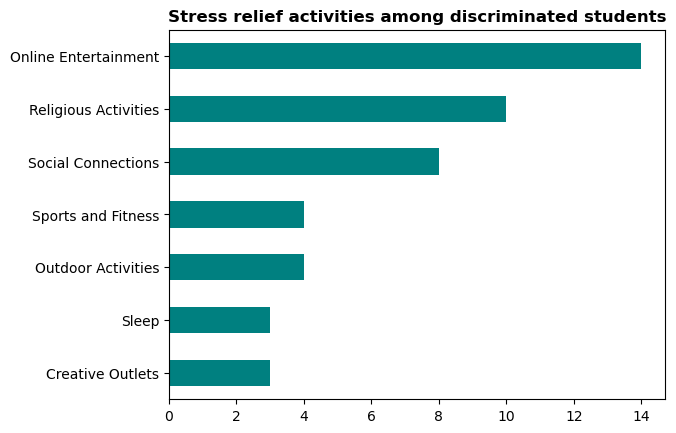

In [11]:
# What do discriminated students do to release stress?
df_stress_release = df_exploded[df_exploded['campus_discrimination']=='Yes'].stress_relief_activities.value_counts().sort_values().plot(kind='barh', stacked=True,color='teal')
plt.title('Stress relief activities among discriminated students', fontweight='bold')
plt.ylabel('')
plt.show()